### You are presented from an inexperienced investor that is investing randomly in a portfolio consisting of random seciurties. The investor wants to narrow their portfolio down to companies that shows them mose promise. The investor is risk adverse and wants the portfolio to have a decent recent and not too much risk
### Optimize the portfolio and find the companies that generate this type of portfolio

In [2]:
tickers = ["BP","ACB","LYFT","CRON","AAL","KO","WFC", "BX", "DAL", 'MVIS', "AMC","AAPL","BB","MSFT","SPCE","FUBO","SNDL",
        "T","ROKU","W","BABA","ABNB","DASH","FOUR","PLTR","CWH","TLRY", "DXCM","TSLA","ESTC","MDB","BA","LUV", "AMZN",
    "SUMO","BYND", "APHA","HEXO","NIO","MARA","OGEN","BBBY", "XNET","DDOG","HAIN","DRIV","RIOT","ODT","AGCB","ALRN",
        "PRGO","FB","CHWY","ESPR","AFRM","DOCU","AMD","OEG", "ENG","NVDA","FTCH", "HOL","ASPL","CCIV","HTZGQ","CCV"]

In [6]:
len(tickers)

66

### Importing Libraries

In [17]:
import pandas as pd 
import numpy as np 
from pandas_datareader import data as web 
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.DataFrame()

### Downloading data 
- will import data form vesting period 2018-12-31 - current

In [5]:
for t in tickers:
    df[t] = web.DataReader(t, data_source="yahoo", start = "2018-12-31")["Adj Close"]

In [9]:
##df.to_csv("client_portfolio_data.csv")

### Checking for missing data 
- There are a few new clients in this data set with missing data
- We will ignore this since we will be looking at the total volatility for the portfolio 
- This will take into the mean of the daily returns

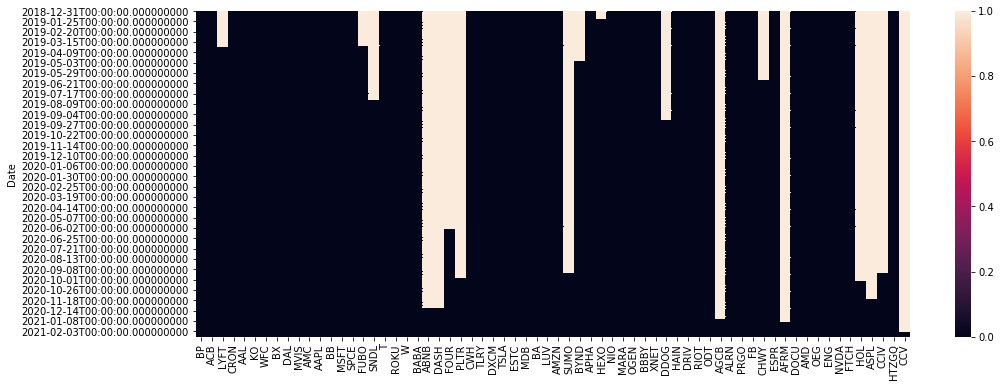

In [18]:
plt.figure(figsize=(16,6))
sns.heatmap(df.isnull())

### Portfolio Returns

In [19]:
returns = df.pct_change()

In [20]:
returns

,BP,ACB,LYFT,CRON,AAL,KO,WFC,BX,DAL,MVIS,...,AMD,OEG,ENG,NVDA,FTCH,HOL,ASPL,CCIV,HTZGQ,CCV
Date,,,,,,,,,,,,,,,,,,,,,
2018-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-02,0.017669,0.056452,NaN,0.088547,0.011523,-0.008870,0.018663,0.008722,0.003807,0.166667,...,0.020043,0.048780,0.140351,0.020374,-0.019763,NaN,NaN,NaN,0.028571,NaN
2019-01-03,0.005701,-0.019084,NaN,0.020336,-0.074507,-0.006180,-0.007882,-0.027935,-0.089439,0.085714,...,-0.094530,0.116279,0.169231,-0.060417,-0.055300,NaN,NaN,NaN,-0.054843,NaN
2019-01-04,0.031435,0.015564,NaN,0.020797,0.065868,0.019940,0.029633,0.034212,0.047797,0.039474,...,0.114370,0.025000,-0.026316,0.064068,0.059756,NaN,NaN,NaN,0.057272,NaN
2019-01-07,0.003248,0.007663,NaN,0.052632,0.028402,-0.013033,-0.006465,0.029772,0.001255,0.037975,...,0.082632,0.033198,0.013514,0.052941,0.078826,NaN,NaN,NaN,0.045617,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-10,-0.006903,0.212044,0.047912,0.144224,-0.001720,-0.002012,-0.001804,-0.000423,0.009174,-0.060403,...,0.015840,0.045400,0.199723,0.035125,-0.010933,-0.062500,-0.008945,-0.013209,-0.053192,-0.024639
2021-02-11,-0.009731,-0.235201,0.015300,-0.218650,-0.024124,0.014113,-0.014458,-0.002822,-0.004196,0.307857,...,0.003357,-0.011429,-0.050867,0.032951,0.045427,0.008000,-0.015343,-0.041679,-0.073034,-0.006098
2021-02-12,0.025269,-0.137526,0.010163,0.009877,0.016480,0.007753,0.024755,-0.006369,0.013343,0.001092,...,0.011979,-0.020809,-0.059683,-0.018983,0.006808,0.034392,-0.016499,0.269206,-0.006061,0.007888


## Optimizing portfolio 

In [21]:
n_portfolios = 2000
all_weights = np.zeros((n_portfolios, len(returns.columns)))
all_Sharps = np.zeros(n_portfolios)
all_vol = np.zeros(n_portfolios)
all_returns = np.zeros(n_portfolios)

for ind in range(n_portfolios):
    weights = np.array(np.random.random(len(returns.columns)))
    weights = weights/weights.sum()
    all_weights[ind,:] = weights
    
    all_returns[ind] = np.sum(returns.mean() * weights * 252)
    all_vol[ind] = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))
    all_Sharps[ind] = all_returns[ind]/all_vol[ind]

## Getting indexes we need

In [22]:
shp = all_Sharps.argmax()

In [23]:
lowest_vol = all_vol.argmin()

In [24]:
max_returns = all_returns.argmax()

### Plotting the values we need of a scatter

Text(0.5, 1.0, 'Portfolio Optimization with a sharp')

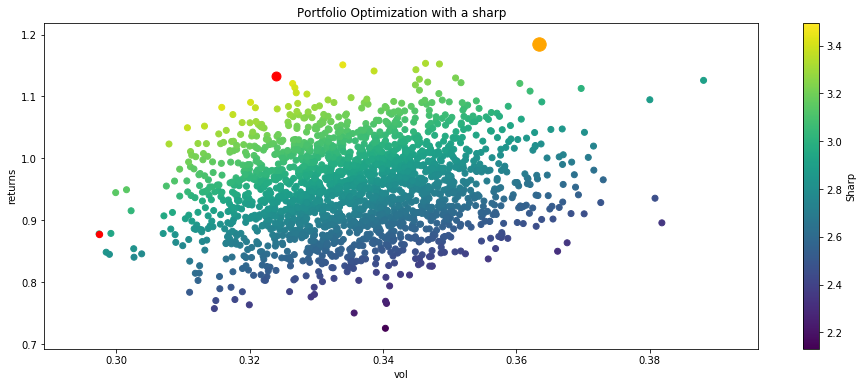

In [26]:
plt.figure(figsize=(16,6))
plt.scatter(all_vol, all_returns, c=all_Sharps)
plt.colorbar(label = "Sharp")
plt.scatter(all_vol[shp], all_returns[shp], c="red", s = 80)
plt.scatter(all_vol[lowest_vol], all_returns[lowest_vol], c="red", s = 40)
plt.scatter(all_vol[max_returns], all_returns[max_returns], c="orange", s = 180)
plt.ylabel("returns")
plt.xlabel("vol")
plt.title("Portfolio Optimization with a sharp")

In [27]:
weights = pd.DataFrame(all_weights, columns=returns.columns)

In [29]:
shp = pd.DataFrame(all_Sharps, columns=["shp"])

In [30]:
vol = pd.DataFrame(all_vol, columns=["vol"])

In [31]:
ret = pd.DataFrame(all_returns, columns=["ret"])

In [32]:
frontier = pd.concat([ret,shp,vol, weights], axis=1)

In [34]:
frontier.sort_values("ret", ascending = False)

,ret,shp,vol,BP,ACB,LYFT,CRON,AAL,KO,WFC,...,AMD,OEG,ENG,NVDA,FTCH,HOL,ASPL,CCIV,HTZGQ,CCV
998,1.184408,3.258917,0.363436,0.030757,0.013908,0.012411,0.006128,0.008048,0.005128,0.015474,...,0.033064,0.022943,0.029750,0.024871,0.009622,0.009874,0.006645,0.019431,0.018386,0.001953
522,1.153400,3.329867,0.346380,0.009033,0.005903,0.012666,0.003870,0.008470,0.017419,0.005075,...,0.001140,0.013728,0.008524,0.027803,0.023601,0.021734,0.028220,0.015836,0.021986,0.009592
226,1.152318,3.306872,0.348462,0.028568,0.029265,0.005746,0.004621,0.003222,0.011075,0.002918,...,0.007790,0.027544,0.009582,0.009457,0.006127,0.018590,0.004551,0.025004,0.004214,0.000827
81,1.150924,3.446132,0.333975,0.001617,0.013312,0.029122,0.018666,0.018554,0.018298,0.011006,...,0.012035,0.015032,0.006632,0.027499,0.007412,0.023562,0.006840,0.031107,0.001908,0.029185
1490,1.143147,3.314074,0.344937,0.018882,0.016621,0.008797,0.021981,0.009768,0.003047,0.007717,...,0.014529,0.001309,0.017725,0.014983,0.000288,0.012074,0.013095,0.021188,0.007634,0.003983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,0.765508,2.247995,0.340529,0.022369,0.010520,0.032636,0.023856,0.013743,0.018146,0.004330,...,0.015834,0.018885,0.021735,0.000888,0.007460,0.010526,0.024388,0.001674,0.030226,0.022130
1534,0.763227,2.385401,0.319958,0.022894,0.013855,0.030114,0.022015,0.004664,0.011234,0.027767,...,0.028407,0.001017,0.004483,0.024318,0.014550,0.022630,0.028870,0.006732,0.013628,0.001613
340,0.757188,2.405945,0.314715,0.019064,0.006674,0.012236,0.023755,0.022645,0.026178,0.022932,...,0.007071,0.001650,0.000466,0.001518,0.021481,0.017733,0.022273,0.000126,0.013575,0.003000
1649,0.750037,2.234409,0.335676,0.029175,0.012796,0.007507,0.012578,0.014419,0.021904,0.008047,...,0.014150,0.000922,0.003357,0.023076,0.012081,0.004063,0.021322,0.007064,0.031264,0.030596


## Top weighted Companies
- Because there are so many companies in the portfolio 
- I narrowed the companies down to the top. 20 weighed for a max return 
- My suggestion for the client is to maybe shrink the portfolio to these 20 companies 

In [47]:
frontier.sort_values("ret", ascending = False).drop(["ret","shp","vol"], 
                                                 axis=1).iloc[0].sort_values(ascending = False).head(20)

AMD     0.033064
PLTR    0.032808
NIO     0.032365
SUMO    0.032090
BP      0.030757
ENG     0.029750
HAIN    0.028735
XNET    0.026996
MVIS    0.026644
AFRM    0.025385
APHA    0.025211
NVDA    0.024871
TLRY    0.024540
MARA    0.024480
AMC     0.024151
OEG     0.022943
PRGO    0.022392
BX      0.021964
DOCU    0.021883
ESTC    0.021300
Name: 998, dtype: float64